In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv('ecommerce_product_dataset.csv')

In [5]:
data.head()

ProductID ProductName     Category   Price  Rating  NumReviews  \
0          1  Headphones  Electronics  400.31     1.7        3772   
1          2  Headphones  Electronics  235.03     2.3        2919   
2          3  Smartwatch  Electronics  417.90     1.8        1184   
3          4  Smartphone  Electronics  152.70     3.4        2047   
4          5      Laptop  Electronics  394.74     1.8        1267   

   StockQuantity  Discount  Sales   DateAdded         City  
0             20      0.08    466  2023-11-10  Albuquerque  
1            663      0.33   1332  2023-09-28       Queens  
2            459      0.31    252  2023-10-20       Austin  
3            475      0.49   1806  2023-12-05       Dallas  
4            831      0.23   1508  2023-08-10       Tucson

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ProductID      1000 non-null   int64  
 1   ProductName    1000 non-null   object 
 2   Category       1000 non-null   object 
 3   Price          1000 non-null   float64
 4   Rating         1000 non-null   float64
 5   NumReviews     1000 non-null   int64  
 6   StockQuantity  1000 non-null   int64  
 7   Discount       1000 non-null   float64
 8   Sales          1000 non-null   int64  
 9   DateAdded      1000 non-null   object 
 10  City           1000 non-null   object 
dtypes: float64(3), int64(4), object(4)
memory usage: 86.1+ KB


In [57]:
data.describe()

ProductID       Price       Rating   NumReviews  StockQuantity  \
count  1000.000000  1000.00000  1000.000000  1000.000000    1000.000000   
mean    500.500000   253.77551     3.025600  2498.753000     495.395000   
std     288.819436   141.40362     1.151004  1463.241871     292.799253   
min       1.000000    10.11000     1.000000     3.000000       0.000000   
25%     250.750000   133.09250     2.100000  1201.750000     241.750000   
50%     500.500000   251.31000     3.100000  2476.000000     505.000000   
75%     750.250000   375.82750     4.000000  3797.500000     743.500000   
max    1000.000000   499.74000     5.000000  4994.000000     993.000000   

          Discount        Sales  
count  1000.000000  1000.000000  
mean      0.251640  1011.037000  
std       0.146455   582.113466  
min       0.000000     0.000000  
25%       0.130000   502.000000  
50%       0.250000   998.000000  
75%       0.380000  1540.000000  
max       0.500000  1997.000000

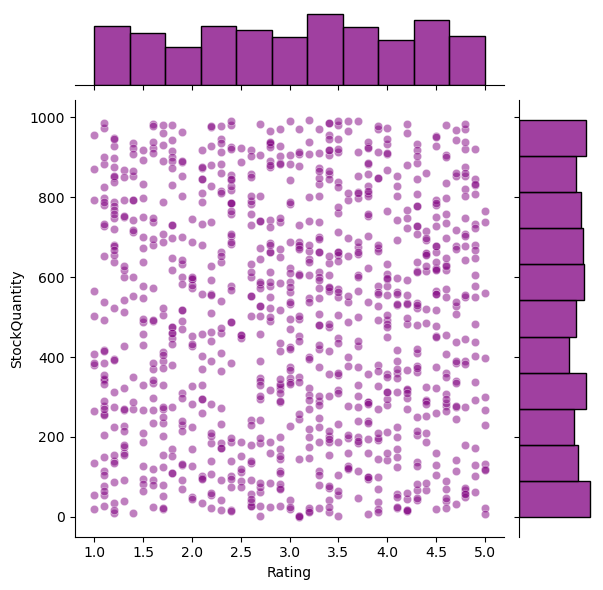

In [31]:
sns.jointplot(x='Rating',y='StockQuantity',data=data,alpha=0.5,color='purple')

<Figure size 200x200 with 0 Axes>

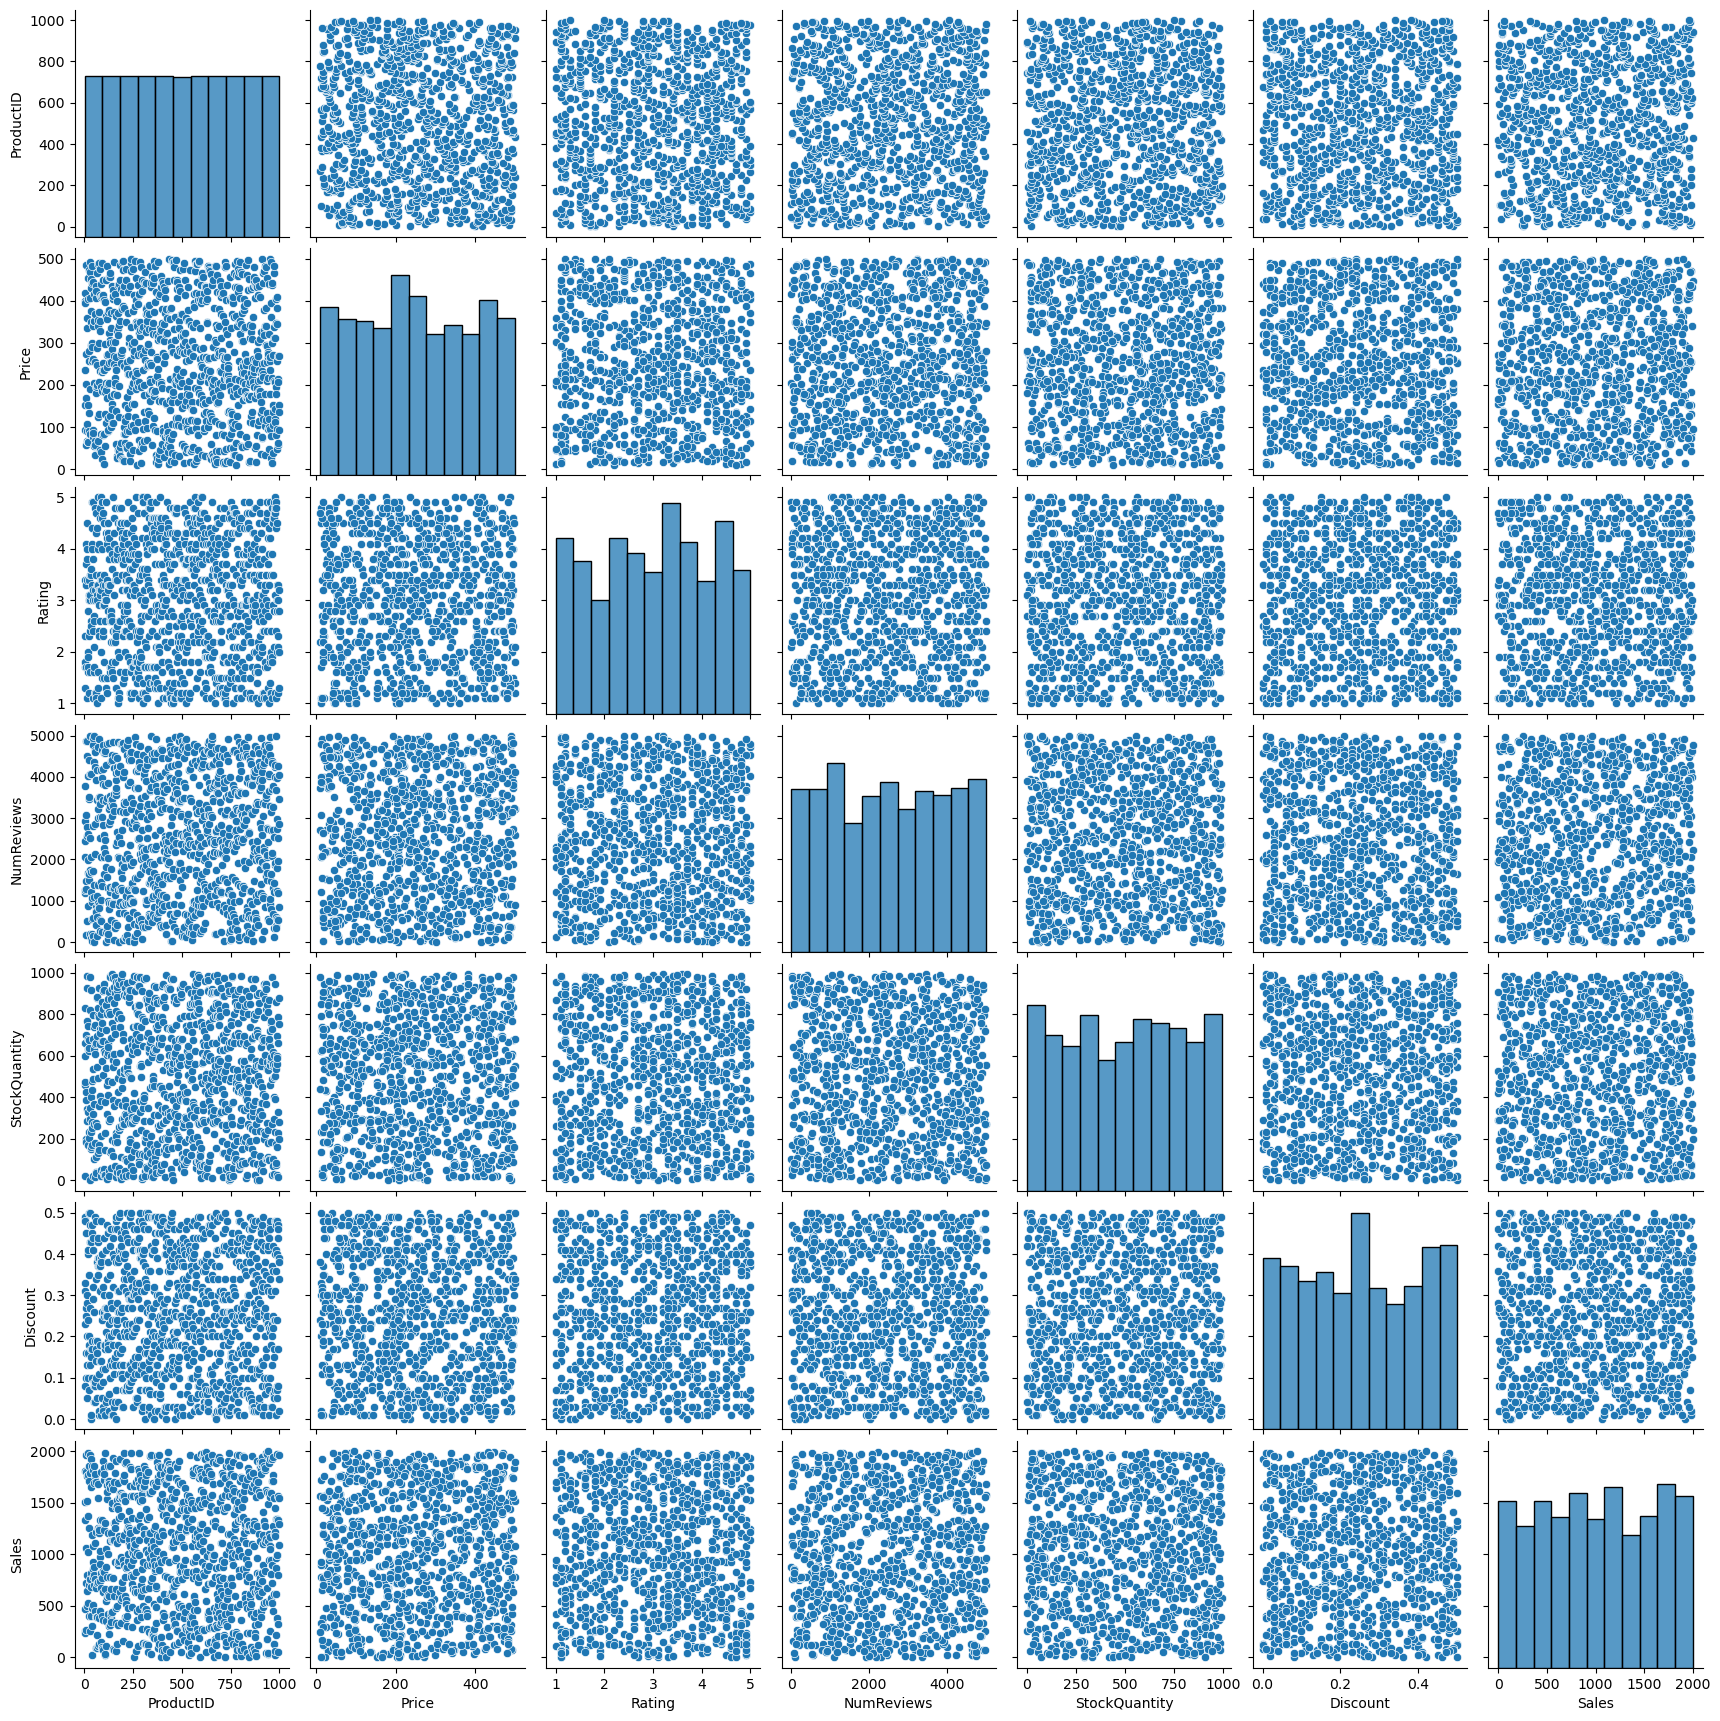

In [41]:
fig=plt.figure(figsize=(10,10),dpi=20)
sns.pairplot(data=data)

<Figure size 200x200 with 0 Axes>

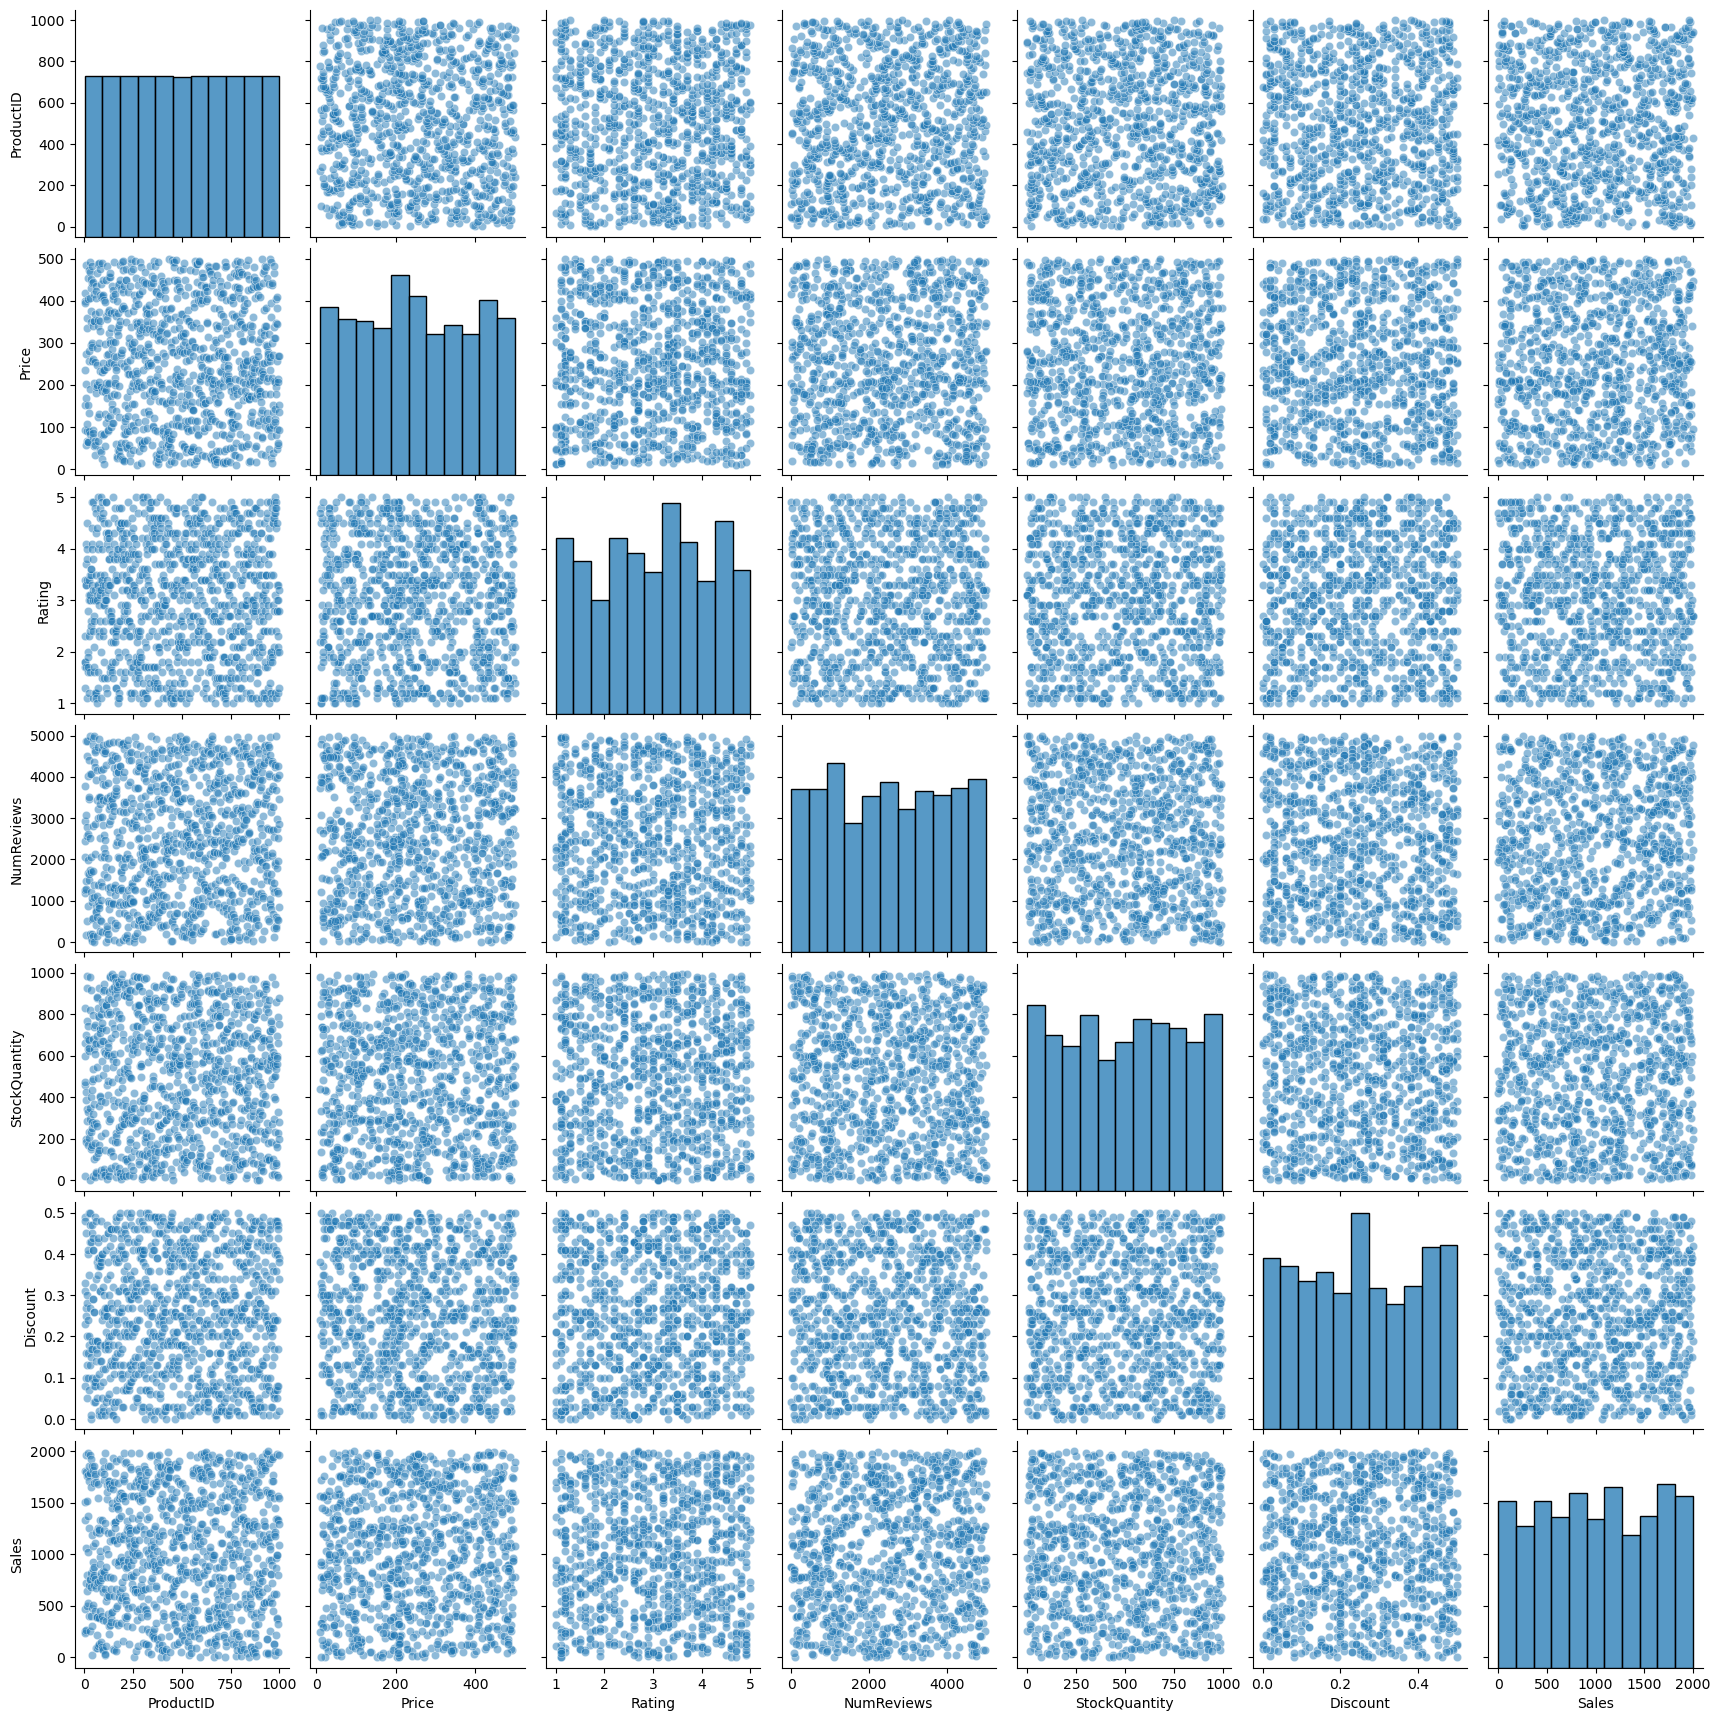

In [49]:
fig=plt.figure(figsize=(10,10),dpi=20)
sns.pairplot(data=data,kind='scatter',plot_kws={'alpha':0.5})

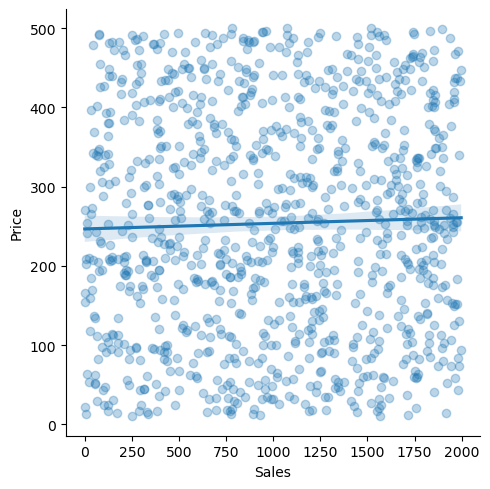

In [53]:
sns.lmplot(x='Sales',y='Price',scatter_kws={'alpha':0.3},data=data)

In [61]:
data.columns

Index(['ProductID', 'ProductName', 'Category', 'Price', 'Rating', 'NumReviews',
       'StockQuantity', 'Discount', 'Sales', 'DateAdded', 'City'],
      dtype='object')

In [79]:
x=data.drop(columns=['ProductID','ProductName','Category','DateAdded','City','Sales'])
y=data['Sales']

In [73]:
from sklearn.model_selection import train_test_split as t

In [193]:
x_train,x_test,y_train,y_test=t(x,y,test_size=0.4,random_state=42)

In [173]:
x_train

Price  Rating  NumReviews  StockQuantity  Discount
29   469.00     1.6        4061            297      0.13
535  175.23     1.6        4166            268      0.20
695  175.28     4.8        4141            820      0.16
557  139.36     2.7         607            674      0.41
836  257.41     4.1        3865             24      0.06
..      ...     ...         ...            ...       ...
106  297.40     3.3        2472            612      0.18
270  205.66     1.6        1540            979      0.46
860  135.64     4.7        3815            246      0.40
435  190.67     2.5         891            454      0.38
102   82.39     1.5        1646            918      0.26

[800 rows x 5 columns]

In [87]:
x_test

Price  Rating  NumReviews  StockQuantity  Discount
858  242.41     1.7        2415            250      0.03
986   94.47     4.5        3979            559      0.08
183   31.74     4.4        4265            520      0.16
502  279.31     3.8         153            938      0.30
710   16.32     1.9         746            701      0.18
..      ...     ...         ...            ...       ...
373   90.76     1.7        1573            787      0.39
44   260.56     3.0        4780             19      0.32
55    33.55     4.8        2849            179      0.19
298  236.35     5.0        4531            398      0.47
644  113.33     4.4        2501            290      0.47

[500 rows x 5 columns]

In [89]:
y_train

994     800
638     370
578     275
736    1906
138     434
       ... 
277    1811
817    1613
255    1141
320    1342
836     737
Name: Sales, Length: 500, dtype: int64

In [91]:
y_test

858    1954
986     370
183    1560
502     218
710     769
       ... 
373     178
44      511
55      761
298     498
644     149
Name: Sales, Length: 500, dtype: int64

In [93]:
from sklearn.linear_model import LinearRegression

In [99]:
model=LinearRegression()

In [195]:
model.fit(x_train,y_train)

LinearRegression()

In [197]:
y_pred=model.predict(x_test)

In [199]:
model.coef_

array([ 0.2465368 ,  4.4892069 ,  0.02265693, -0.07576709, -8.22798295])

In [201]:
coeff=pd.DataFrame(model.coef_,x_test.columns,columns=['Coef'])

In [203]:
coeff

Coef
Price          0.246537
Rating         4.489207
NumReviews     0.022657
StockQuantity -0.075767
Discount      -8.227983

In [205]:
y_pred

array([ 978.28463523,  988.39221256,  979.16526605, 1079.16322026,
       1061.14382418, 1024.73206472, 1070.36296748, 1040.2755526 ,
       1013.37334887, 1083.54142536,  990.55419382, 1150.19434302,
        987.14679061, 1010.96771132, 1050.06665492, 1036.59068175,
        933.28570609,  999.09696041,  983.55968164, 1037.37270201,
        984.88597151, 1028.44750135,  986.64308602,  982.53945937,
        901.09403036, 1001.5638179 , 1075.59369408, 1005.99468043,
       1027.25896107, 1122.03139423,  943.36475566, 1015.15095601,
       1059.60698637, 1039.13049527,  947.85411124, 1015.3009888 ,
       1005.87411026,  935.96792209, 1074.54574154,  981.8760716 ,
       1007.14967091, 1082.48975762, 1030.07301608,  996.40726763,
        964.45642382,  998.00459078, 1000.30908111,  983.70256604,
        941.58574063, 1003.60848977,  994.68613286, 1025.83076639,
       1063.37627394, 1041.34184066,  947.38534884, 1158.94437204,
        940.54545594, 1091.53946571, 1033.04127131, 1069.94800

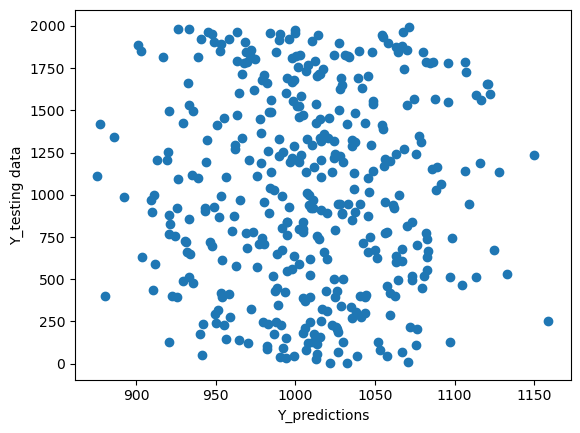

In [207]:
import matplotlib.pyplot as plt
plt.plot(y_pred,y_test,'o')
plt.xlabel('Y_predictions')
plt.ylabel('Y_testing data')
plt.show()

In [145]:
from sklearn.metrics import r2_score

In [209]:
r2=r2_score(y_pred,y_test)

In [211]:
print(r2)

-119.14301129534927


In [291]:
from sklearn.preprocessing  import PolynomialFeatures
degree = 2  
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(x_train)
X_test_poly = poly.transform(x_test)
model = LinearRegression()
model.fit(X_train_poly, y_train)
y_predi = model.predict(X_test_poly)
r2 = r2_score(y_test, y_predi)

print(f"R² Score: {r2:.4f}")

R² Score: -0.0224


In [247]:
from sklearn.ensemble import RandomForestRegressor

In [261]:
model=RandomForestRegressor(n_estimators=100,random_state=42)

In [275]:
model.fit(x_train,y_train)

RandomForestRegressor(random_state=42)

In [277]:
y_prediction=model.predict(x_test)

In [279]:
ac=r2_score(y_prediction,y_test)

In [281]:
ac

-11.844182467043105

In [287]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [299]:
print("Mean squared error is : ",mean_squared_error(y_pred,y_test))
print("Mean absloute error is : ",mean_absolute_error(y_pred,y_test))

Mean squared error is :  340428.13295768364
Mean absloute error is :  500.0462621188462


## here the error was too high